In [1]:
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa
from IPython.display import Audio
import os, os.path
%matplotlib inline

C:\Users\Ben\Anaconda\lib\site-packages\librosa\core\audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


In [2]:
sr = 22050

In [3]:
ayy, sr = librosa.load('Sounds/ayy.wav', sr=sr)

In [4]:
Audio(ayy, rate=sr)

In [5]:
aw, sr = librosa.load('Sounds/aw.wav', sr=sr)

IOError: [Errno 2] No such file or directory: 'C:\\Users\\Ben\\Documents\\MEGAsync\\Computerized Speech\\Sounds\\aw.wav'

In [ ]:
ah, sr = librosa.load('Sounds/ah.wav', sr=sr)

In [ ]:
b, sr = librosa.load('Sounds/b.wav', sr=sr)

In [ ]:
k, sr = librosa.load('Sounds/k.wav', sr=sr)

In [ ]:
print(np.shape(aw),np.shape(ah),np.shape(b),np.shape(k))

In [ ]:
print(np.shape(np.append(b,ah)))

In [ ]:
cutoff = 800

In [ ]:
Audio(np.append(np.append(b[cutoff/4:-cutoff], ah[cutoff:-cutoff]), k[cutoff:-cutoff]), rate=1.2*sr)

In [3]:
# loads all sound files AND sample rates in the Sounds/ directory into a list of tuples
sounds = [(librosa.load("Sounds/" + i,sr=sr)) for i in os.listdir("Sounds") if ".wav" in i]

# Run this to convert each sound clip into a numpy array
# TODO: double-check whether or not librosa already imports them as numpy arrays
# for i in xrange(len(sounds)):
#     sounds[i] = (np.array(sounds[i][0]),sounds[i][1])

In [ ]:
os.listdir('Sounds')

In [4]:
# Audio(np.append(sounds[100][0],sounds[118][0]), rate=sounds[100][1])
# hello_Lili_audio = np.append(np.append(np.append(np.append(sounds[332][0],sounds[221][0]),sounds[448][0]),
#                 sounds[447][0]),sounds[443][0])
hello_Lili_audio = np.append(np.append(np.append(sounds[332][0],sounds[448][0]),
                sounds[447][0]),sounds[443][0])
Audio(hello_Lili_audio, rate=sounds[233][1])

In [8]:
librosa.output.write_wav('hello_Lili_audio.wav', hello_Lili_audio, sr)

In [5]:
hello_Farzan_audio = np.append(np.append(np.append(np.append(sounds[332][0],sounds[448][0]),
                sounds[294][0]),sounds[858][0]),sounds[472][0])
Audio(hello_Farzan_audio, rate=sounds[233][1])

In [10]:
librosa.output.write_wav('hello_Farzan_audio.wav', hello_Farzan_audio, sr)

In [6]:
high_pitch_hello_Farzan_audio = librosa.istft(librosa.core.phase_vocoder(librosa.stft(hello_Farzan_audio), 0.5, hop_length=None))
print(high_pitch_hello_Farzan_audio)
librosa.output.write_wav('high_pitch_hello_Farzan_audio.wav', high_pitch_hello_Farzan_audio, sr*2)
Audio(high_pitch_hello_Farzan_audio,rate=sr*2)

[-0.00016349 -0.00102795 -0.00622429 ...,  0.00068053 -0.00109593
 -0.01312411]


In [7]:
low_pitch_hello_Farzan_audio = librosa.istft(librosa.core.phase_vocoder(librosa.stft(hello_Farzan_audio), 1.5, hop_length=None))
print(low_pitch_hello_Farzan_audio)
librosa.output.write_wav('low_pitch_hello_Farzan_audio.wav', low_pitch_hello_Farzan_audio, sr/1.75)
Audio(low_pitch_hello_Farzan_audio,rate=sr/1.75)

[-0.00400051 -0.00358083 -0.00711572 ...,  0.08992087  0.10165527
  0.0956087 ]


In [8]:
high_pitch_hello_Lili_audio = librosa.istft(librosa.core.phase_vocoder(librosa.stft(hello_Lili_audio), 0.5, hop_length=None))
print(high_pitch_hello_Lili_audio)
librosa.output.write_wav('high_pitch_hello_Lili_audio.wav', high_pitch_hello_Lili_audio, sr*2)
Audio(high_pitch_hello_Lili_audio,rate=sr*2)

[-0.00016349 -0.00102795 -0.00622429 ..., -0.01075336 -0.00990515
 -0.00886252]


In [9]:
low_pitch_hello_Lili_audio = librosa.istft(librosa.core.phase_vocoder(librosa.stft(hello_Lili_audio), 1.5, hop_length=None))
print(low_pitch_hello_Lili_audio)
librosa.output.write_wav('low_pitch_hello_Lili_audio.wav', low_pitch_hello_Lili_audio, sr/1.75)
Audio(low_pitch_hello_Lili_audio,rate=sr/1.75)

[-0.00400051 -0.00358083 -0.00711572 ..., -0.00279247 -0.00402573
 -0.00581058]


In [10]:
hello_Nick_audio = np.append(np.append(np.append(sounds[332][0],sounds[448][0]),
                sounds[498][0]),sounds[404][0])
librosa.output.write_wav('hello_Nick_audio.wav', hello_Nick_audio, sr)
Audio(hello_Nick_audio, rate=sounds[233][1])

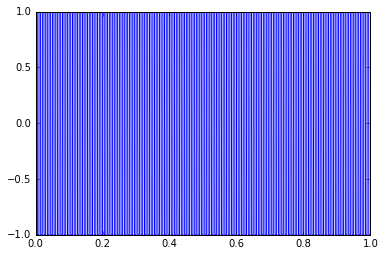

In [11]:
freq = 100
t = np.linspace(0, 1, len(hello_Lili_audio), endpoint=False)
plt.plot(t, sp.signal.square(2 * np.pi * freq * t))
robot = hello_Lili_audio * sp.signal.square(2 * np.pi * freq * t)
librosa.output.write_wav('robot.wav', robot, sr)
Audio(robot, rate=sounds[233][1])

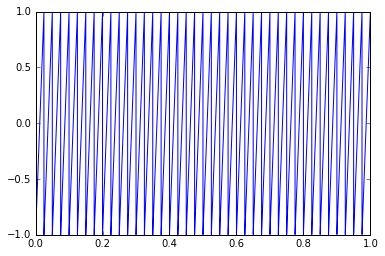

In [43]:
freq = 40
t = np.linspace(0, 1, len(hello_Nick_audio), endpoint=False)
plt.plot(t, sp.signal.sawtooth(2 * np.pi * freq * t))
robot = hello_Nick_audio * sp.signal.sawtooth(2 * np.pi * freq * t)
Audio(robot, rate=sounds[233][1])

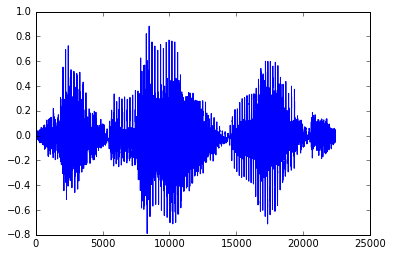

In [46]:
plt.plot(hello_Nick_audio)

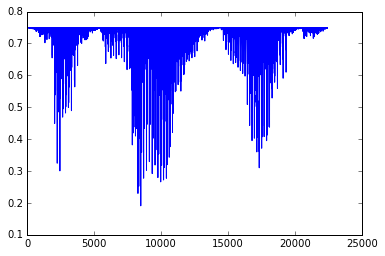

In [47]:
plt.plot(sp.signal.quadratic(hello_Nick_audio))

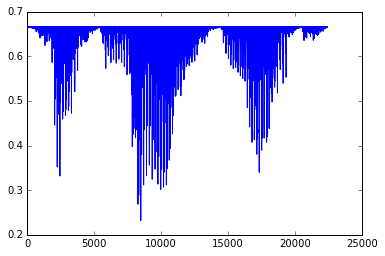

In [48]:
plt.plot(sp.signal.cubic(hello_Nick_audio))

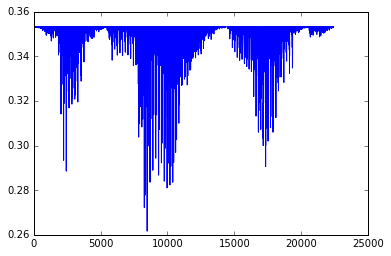

In [54]:
plt.plot(sp.signal.bspline(hello_Nick_audio,14))

In [20]:
# high_pitch_hello_Lili_audio = librosa.istft(librosa.core.phase_vocoder(librosa.stft(hello_Lili_audio), 0.5, hop_length=None))
audio_list = []
for i in xrange(4):
    audio_list.append(librosa.effects.pitch_shift(hello_Lili_audio, sr, i * 4.0))
# Audio(high_pitch_hello_Lili_audio,rate=sr*2)
output = audio_list[0]
for i in xrange(1, 4):
    output += audio_list[i]
librosa.output.write_wav('harmonic_hello_Lili_audio.wav', output, sr)
Audio(output,rate=sr)